## Exercício 1 - Regrassão Linear



In [ ]:
# Bibliotecas usadas no programa

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Importando banco de dados do treinamento já tratado

df_cars = pd.read_csv("Treinamento.csv")
display(df_cars.head(2))

# Tratamento de dados, eliminando carros recentes com baixissimo custo

i = 0
while i < df_cars.shape[0]:
  if float(df_cars.loc[i, 'price']) < 500 and int(df_cars.loc[i, 'year']) >= 2018:
    df_cars = df_cars.drop(index=i)
  i += 1

# Transformando variáveis categórias em numéricas

df_dummies = pd.get_dummies(df_cars)
display(df_dummies.head(2))

,price,year,condition,cylinders,fuel,odometer,transmission,size,type
0,10400,2011,excellent,4 cylinders,gas,81300,automatic,mid-size,sedan
1,6900,2007,excellent,6 cylinders,gas,79000,automatic,full-size,sedan


27999.0


,price,year,odometer,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,cylinders_4 cylinders,...,transmission_automatic,transmission_manual,size_compact,size_full-size,size_mid-size,size_sub-compact,type_coupe,type_hatchback,type_sedan,type_wagon
0,10400,2011,81300,1,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
1,6900,2007,79000,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


In [ ]:
# SOLUÇÃO DOS MÍNIMOS QUADRADOS:

# Criação da lista dos rótulos "d"
d = df_cars['price'].to_numpy().reshape(-1, 1)

# Criação da matriz "X" de entrada com as dimensões de df_dummies
N = df_dummies.shape[0]
M = df_dummies.shape[1]

X = np.zeros((N, M))

# Colocando lista unitária na primeira coluna representado o bias
X[:, [0]] = np.ones((N, 1))

# Inserção dos outros parâmetros nas colunas de X, menos a coluna price (0)!
for colunas in range(1, df_dummies.shape[1]):
  X[:, [colunas]] = df_dummies[df_dummies.columns[colunas]].to_numpy().reshape(-1, 1)

# R é o produto das matrizes X.T e X
R = X.T @ X

# o vetor p é dado pelo produto entre a matriz X.T e o vetor d
p = X.T @ d

# Foi calculado wo pelo sistema linear usando a função np.linalg.solve
wo = np.linalg.solve(R, p)

# Uma vez calculada a solução dos mínimos quadrados, podemos calcular o vetor de erro
e = d - X @ wo

In [ ]:
# Importando banco de dados do teste
df_test = pd.read_csv("Teste.csv")
display(df_test.head(2))

# Transformando variáveis categórias em numéricas: X teste
df_testdumies = pd.get_dummies(df_test)
display(df_testdumies.head(2))

# Criação da lista dos rótulos "d" testes para comparação com o modelo
d_test = df_test['price'].to_numpy().reshape(-1, 1)

,price,year,condition,cylinders,fuel,odometer,transmission,size,type
0,11995,2018,excellent,4 cylinders,gas,19000,automatic,mid-size,sedan
1,20500,2017,excellent,6 cylinders,gas,68000,automatic,full-size,sedan


,price,year,odometer,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,cylinders_4 cylinders,...,transmission_automatic,transmission_manual,size_compact,size_full-size,size_mid-size,size_sub-compact,type_coupe,type_hatchback,type_sedan,type_wagon
0,11995,2018,19000,1,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
1,20500,2017,68000,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


In [ ]:
# Obtivemos os rótulos pelo modelo de regressão:

# Criação da primeira coluna dos rótulos w0 
dt = wo[0]*np.ones((df_testdumies.shape[0], 1))

# Inserção dos outros componentes nos rótulos
for cols in range(1, df_testdumies.shape[1]):
  dt += wo[cols][0] * df_testdumies[df_testdumies.columns[cols]].to_numpy().reshape(-1, 1)

z = []
for i in range(0, df_testdumies.shape[0]):
  z.append(i)


Erro gerado no treinamento:
        Erro Treinamento: "e" em R$
count                  7452.000000
mean                   3471.677403
std                    3596.600250
min                       0.355978
25%                    1105.416145
50%                    2412.696051
75%                    4382.954698
max                   25765.912746 

Erro quadrático médio:  4998.633963919359 



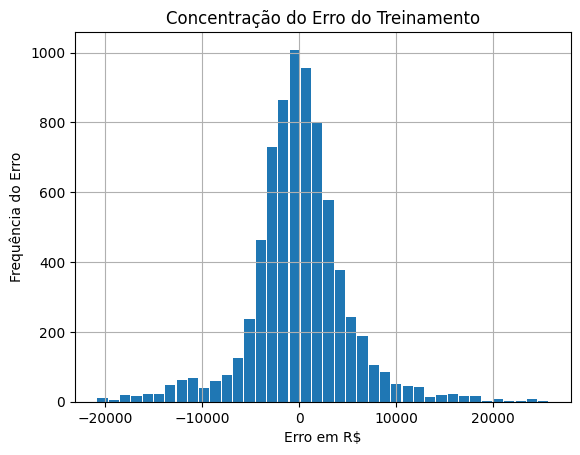

In [ ]:
# Validação do Modelo:

# Apresentação do erro "e" gerado no treinamento do modelo

df1_erro_treinamento = pd.DataFrame(data=abs(e), columns=['Erro Treinamento: "e" em R$'])
print("\nErro gerado no treinamento:\n", df1_erro_treinamento.describe(), "\n")

rmse = np.sqrt(np.sum(e**2)/d.shape[0])
print("Erro quadrático médio: ", rmse, "\n")

plt.title('Concentração do Erro do Treinamento')
plt.xlabel('Erro em R$')
plt.ylabel('Frequência do Erro')
plt.hist(e, 40, rwidth=0.9)
plt.grid()


Erro gerado no teste:
        Erro Teste: dmodelo - dteste em R$
count                         2084.000000
mean                          3589.763971
std                           3630.370008
min                              0.784262
25%                           1095.212060
50%                           2509.586038
75%                           4658.692004
max                          22375.656943 

Erro quadrático médio:  5104.867048720102 



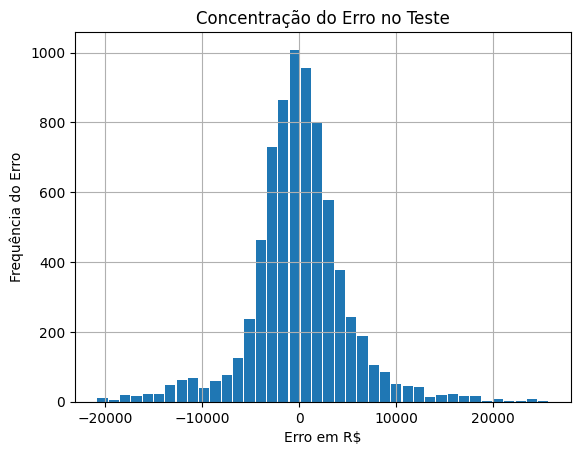

In [ ]:
# Cálculo do erro entre o preço gerado pelo modelo nos testes e os valores reais

df_erro_teste = pd.DataFrame(data=abs(d_test-dt), columns=['Erro Teste: dmodelo - dteste em R$'])
print("\nErro gerado no teste:\n", df_erro_teste.describe(),"\n")

rmse = np.sqrt(np.sum((d_test-dt)**2)/len(d_test))
print("Erro quadrático médio: ", rmse, "\n")

plt.title('Concentração do Erro no Teste')
plt.xlabel('Erro em R$')
plt.ylabel('Frequência do Erro')
plt.hist(e, 40, rwidth=0.9)
plt.grid()

##Conclusões

Filtrar os dados espúrios ajudou a diminuir o erro no treinamento, tornando o modelo mais acertivo. No geral o modelo mostrou-se muito acertivo, com uma concetração de erro na distribuição normal em torno de 0.

Optou-se por um modelo mais acertivo em uma faixa mais comum de valores, do que um modelo que preveja tudo mas que por conta disso tenha um erro maior.
